# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "../output_data/cities.csv"
# csv_file=pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# csv_file.head()


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_lng_lst=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_lng_lst.append(lat_lng)

# Print the city count to confirm sufficient count
len(cities)
# pprint(lat_lng_lst)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create a DataFrame 
cities_df=pd.DataFrame(cities)
cities_df=cities_df.rename(columns={0:"Cities"})
cities_df.head()

,Cities
0,vyritsa
1,cherskiy
2,mount gambier
3,caravelas
4,clyde river


In [4]:
cities_df["lat_lng_lst"]=lat_lng_lst
cities_df["Latitude"]=cities_df["lat_lng_lst"].map(lambda x: str(x[0]))
cities_df["Longtitude"]=cities_df["lat_lng_lst"].map(lambda x: str(x[1]))
del cities_df['lat_lng_lst']
cities_df

,Cities,Latitude,Longtitude
0,vyritsa,59.4548767806821,30.361195142584677
1,cherskiy,67.03707675118818,161.35273909177408
2,mount gambier,-43.12024570392598,138.01868471041576
3,caravelas,-25.382881455070105,-23.78799630659674
4,clyde river,72.17376830786253,-68.02660066041537
...,...,...,...
612,inirida,4.221760391038288,-66.23426037634702
613,honiara,-11.954751715707275,158.6955642243105
614,tambura,6.267035314225936,27.287620090439987
615,kuche,39.35145883946677,84.25492533334682


In [5]:
#Create new columns for data we'll be collecting from the API
max_temp=[]
humidity=[]
cloud=[]
wind_speed=[]
country=[]
date=[]

url = "http://api.openweathermap.org/data/2.5/weather?"
city=cities_df["Cities"]

units="imperial"
#Build Partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + "&APPID=" + weather_api_key
print("Beginning Data Retrieval")
print("-------------------------")
counter=1
for city in cities:

    response=requests.get(query_url+city).json()
    try:
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
       
        print(f"Processing Record {counter} | {response['name']}")
        print(query_url+city)
        counter=counter+1
#         print("The data is found!")
    except:
        max_temp.append(None)
        humidity.append(None)
        cloud.append(None)
        wind_speed.append(None)
        country.append(None)
        date.append(None)
        print("The data couldn't be found!")
    next

Beginning Data Retrieval
-------------------------
Processing Record 1 | Vyritsa
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=vyritsa
Processing Record 2 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=cherskiy
Processing Record 3 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=mount gambier
Processing Record 4 | Caravelas
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=caravelas
Processing Record 5 | Clyde River
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=clyde river
Processing Record 6 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=albany
Processing Record 7 | Bor
http://api.openweathermap.org/data/2.5/weather?appid=

The data couldn't be found!
Processing Record 60 | Cervo
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=cervo
Processing Record 61 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=leningradskiy
The data couldn't be found!
Processing Record 62 | Kapaa
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=kapaa
Processing Record 63 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=chokurdakh
Processing Record 64 | Ust'-Ishim
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=ust-ishim
Processing Record 65 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=carnarvon
Processing Record 66 | Bluff
http://api.openweathermap.org/data/2.5/weath

Processing Record 119 | Esperance
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=esperance
Processing Record 120 | Tahe
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=tahe
Processing Record 121 | Conde
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=conde
Processing Record 122 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=kruisfontein
Processing Record 123 | Taksimo
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=taksimo
Processing Record 124 | El Salvador
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=salvador
Processing Record 125 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=im

Processing Record 176 | Olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=olafsvik
Processing Record 177 | Banjar
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=banjar
Processing Record 178 | Vao
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=vao
Processing Record 179 | Byron Bay
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=byron bay
Processing Record 180 | Vanimo
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=vanimo
Processing Record 181 | Narsaq
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=narsaq
Processing Record 182 | Ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=ulaanbaatar

Processing Record 233 | Taltal
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=taltal
Processing Record 234 | Mazagão
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=mazagao
Processing Record 235 | Samarai
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=samarai
Processing Record 236 | Shingū
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=shingu
Processing Record 237 | Davidson
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=davidson
Processing Record 238 | Iquique
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=iquique
Processing Record 239 | Novo Aripuanã
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=nov

Processing Record 292 | Orsha
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=orsha
Processing Record 293 | Novy Urengoy
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=novyy urengoy
Processing Record 294 | Rodrigues Alves
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=rodrigues alves
The data couldn't be found!
The data couldn't be found!
The data couldn't be found!
Processing Record 295 | Raja
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=raga
Processing Record 296 | Brae
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=brae
Processing Record 297 | Shitanjing
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=shitanjing
Processing Record 298 | Kosonsoy
http://a

Processing Record 349 | Christchurch
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=christchurch
Processing Record 350 | Were Īlu
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=were ilu
Processing Record 351 | Morgan City
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=morgan city
Processing Record 352 | Sur
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=sur
Processing Record 353 | Araouane
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=araouane
Processing Record 354 | Aykhal
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=aykhal
Processing Record 355 | Imbituba
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imper

Processing Record 406 | Tazovsky
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=tazovskiy
Processing Record 407 | Grajaú
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=grajau
Processing Record 408 | Nsoko
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=nsoko
Processing Record 409 | Ligayan
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=ligayan
Processing Record 410 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=makakilo city
Processing Record 411 | Tiruchchendur
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=tiruchchendur
Processing Record 412 | Kachug
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&unit

The data couldn't be found!
The data couldn't be found!
Processing Record 465 | Mombetsu
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=mombetsu
Processing Record 466 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=saint-augustin
Processing Record 467 | Russell
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=russell
Processing Record 468 | Kemin
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=kemin
Processing Record 469 | Korla
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=korla
Processing Record 470 | Yeppoon
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=yeppoon
Processing Record 471 | Tarakan
http://api.openweathermap.org/data/2.5/weather

Processing Record 522 | Souillac
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=souillac
Processing Record 523 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=pacific grove
The data couldn't be found!
Processing Record 524 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=quatre cocos
Processing Record 525 | Havøysund
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=havoysund
Processing Record 526 | Derbent
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=derbent
The data couldn't be found!
Processing Record 527 | Saldanha
http://api.openweathermap.org/data/2.5/weather?appid=d31988c4747643e6cbfa38e3be559102&units=imperial&q=saldanha
Processing Record 528 | Nānākuli
http://api.openweatherm

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df['Max_Temp']=max_temp
cities_df['Humidity']=humidity
cities_df['Cloudiness']=cloud
cities_df['WindSpeed']=wind_speed
cities_df['Country']=country
cities_df['Date']=date

cities_df


,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,vyritsa,59.4548767806821,30.361195142584677,63.00,77.0,12.0,4.47,RU,1.595200e+09
1,cherskiy,67.03707675118818,161.35273909177408,71.44,43.0,0.0,5.91,RU,1.595200e+09
2,mount gambier,-43.12024570392598,138.01868471041576,44.60,93.0,40.0,6.93,AU,1.595200e+09
3,caravelas,-25.382881455070105,-23.78799630659674,71.94,82.0,92.0,7.27,BR,1.595200e+09
4,clyde river,72.17376830786253,-68.02660066041537,46.40,75.0,90.0,9.17,CA,1.595200e+09
...,...,...,...,...,...,...,...,...,...
612,inirida,4.221760391038288,-66.23426037634702,76.01,94.0,89.0,1.36,CO,1.595200e+09
613,honiara,-11.954751715707275,158.6955642243105,84.20,74.0,75.0,3.36,SB,1.595200e+09
614,tambura,6.267035314225936,27.287620090439987,66.87,97.0,99.0,2.33,SS,1.595200e+09
615,kuche,39.35145883946677,84.25492533334682,NaN,NaN,NaN,NaN,None,NaN


In [7]:
cities_df.count()

Cities        617
Latitude      617
Longtitude    617
Max_Temp      568
Humidity      568
Cloudiness    568
WindSpeed     568
Country       568
Date          568
dtype: int64

In [8]:
cities_df=cities_df.dropna(how='any')
cities_df

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,vyritsa,59.4548767806821,30.361195142584677,63.00,77.0,12.0,4.47,RU,1.595200e+09
1,cherskiy,67.03707675118818,161.35273909177408,71.44,43.0,0.0,5.91,RU,1.595200e+09
2,mount gambier,-43.12024570392598,138.01868471041576,44.60,93.0,40.0,6.93,AU,1.595200e+09
3,caravelas,-25.382881455070105,-23.78799630659674,71.94,82.0,92.0,7.27,BR,1.595200e+09
4,clyde river,72.17376830786253,-68.02660066041537,46.40,75.0,90.0,9.17,CA,1.595200e+09
...,...,...,...,...,...,...,...,...,...
610,manicore,-5.361339495267302,-61.16449533539483,86.00,70.0,58.0,1.12,BR,1.595200e+09
611,sulphur springs,32.844566047384845,-95.31455595690723,99.00,34.0,1.0,9.17,US,1.595200e+09
612,inirida,4.221760391038288,-66.23426037634702,76.01,94.0,89.0,1.36,CO,1.595200e+09
613,honiara,-11.954751715707275,158.6955642243105,84.20,74.0,75.0,3.36,SB,1.595200e+09


In [9]:
cities_df.count()

Cities        568
Latitude      568
Longtitude    568
Max_Temp      568
Humidity      568
Cloudiness    568
WindSpeed     568
Country       568
Date          568
dtype: int64

In [10]:
cities_df.head()

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,vyritsa,59.4548767806821,30.361195142584677,63.00,77.0,12.0,4.47,RU,1.595200e+09
1,cherskiy,67.03707675118818,161.35273909177408,71.44,43.0,0.0,5.91,RU,1.595200e+09
2,mount gambier,-43.12024570392598,138.01868471041576,44.60,93.0,40.0,6.93,AU,1.595200e+09
3,caravelas,-25.382881455070105,-23.78799630659674,71.94,82.0,92.0,7.27,BR,1.595200e+09
4,clyde river,72.17376830786253,-68.02660066041537,46.40,75.0,90.0,9.17,CA,1.595200e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
humidity_cities=cities_df.loc[cities_df['Humidity']>100]
humidity_cities 

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date


In [13]:
cities_df['Latitude'] = cities_df['Latitude'].astype(float)
cities_df['Longtitude']=cities_df['Longtitude'].astype(float)
cities_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,vyritsa,59.454877,30.361195,63.00,77.0,12.0,4.47,RU,1.595200e+09
1,cherskiy,67.037077,161.352739,71.44,43.0,0.0,5.91,RU,1.595200e+09
2,mount gambier,-43.120246,138.018685,44.60,93.0,40.0,6.93,AU,1.595200e+09
3,caravelas,-25.382881,-23.787996,71.94,82.0,92.0,7.27,BR,1.595200e+09
4,clyde river,72.173768,-68.026601,46.40,75.0,90.0,9.17,CA,1.595200e+09
...,...,...,...,...,...,...,...,...,...
610,manicore,-5.361339,-61.164495,86.00,70.0,58.0,1.12,BR,1.595200e+09
611,sulphur springs,32.844566,-95.314556,99.00,34.0,1.0,9.17,US,1.595200e+09
612,inirida,4.221760,-66.234260,76.01,94.0,89.0,1.36,CO,1.595200e+09
613,honiara,-11.954752,158.695564,84.20,74.0,75.0,3.36,SB,1.595200e+09


In [14]:
# del cities_df['Country']


In [15]:
cities_df.describe()

,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,15.776709,21.370563,69.763327,72.098592,49.411972,7.448732,1.595200e+09
std,36.572480,94.553860,13.808037,20.261800,36.902120,4.988433,9.404917e+01
min,-89.829856,-179.957894,28.400000,3.000000,0.000000,0.040000,1.595200e+09
25%,-9.723059,-57.995030,59.452500,62.000000,12.000000,3.665000,1.595200e+09
50%,18.107236,25.764681,71.600000,77.000000,46.000000,6.220000,1.595200e+09
75%,44.762472,104.340003,79.250000,87.000000,84.000000,10.290000,1.595200e+09
max,89.009888,179.932934,107.010000,100.000000,100.000000,27.510000,1.595200e+09


In [16]:
#  Get the indices of cities that have humidity over 100%.
cities_df[cities_df['Humidity']>100].index


Int64Index([], dtype='int64')

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clear_city_data=cities_df.drop(cities_df[cities_df['Humidity']>100].index)
# cities_df.drop(cities_df[cities_df['Humidity']>100].index, inplace=True)
clear_city_data.head()

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,vyritsa,59.454877,30.361195,63.00,77.0,12.0,4.47,RU,1.595200e+09
1,cherskiy,67.037077,161.352739,71.44,43.0,0.0,5.91,RU,1.595200e+09
2,mount gambier,-43.120246,138.018685,44.60,93.0,40.0,6.93,AU,1.595200e+09
3,caravelas,-25.382881,-23.787996,71.94,82.0,92.0,7.27,BR,1.595200e+09
4,clyde river,72.173768,-68.026601,46.40,75.0,90.0,9.17,CA,1.595200e+09


In [18]:
output_data_file="../output_data/results.csv"


In [19]:
# Extract relevant fields from the data frame

clear_city_data.to_csv(output_data_file)
# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

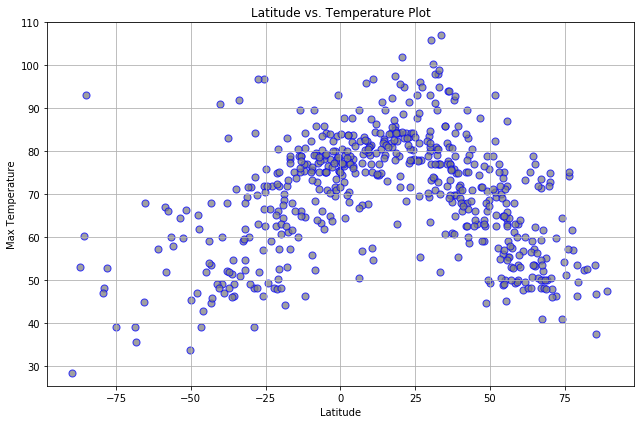

In [23]:
#Build a Scatter plot for each data type
plt.figure(figsize=(9,6))
plt.scatter(clear_city_data["Latitude"],clear_city_data['Max_Temp'], marker='o',facecolors="grey",edgecolors="blue", s=50, alpha=0.75)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.grid(True)

#save the figure
# plt.savefig("LatitudevsTemperature_scatter_plot.png")
#Modify ticks
plt.xlim(-98, 98)
plt.ylim(min(clear_city_data['Max_Temp'])-3, max(clear_city_data['Max_Temp'])+3)

plt.tight_layout()
plt.show()

            

## Latitude vs. Humidity Plot

In [24]:
clear_city_data.head()

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,vyritsa,59.454877,30.361195,63.00,77.0,12.0,4.47,RU,1.595200e+09
1,cherskiy,67.037077,161.352739,71.44,43.0,0.0,5.91,RU,1.595200e+09
2,mount gambier,-43.120246,138.018685,44.60,93.0,40.0,6.93,AU,1.595200e+09
3,caravelas,-25.382881,-23.787996,71.94,82.0,92.0,7.27,BR,1.595200e+09
4,clyde river,72.173768,-68.026601,46.40,75.0,90.0,9.17,CA,1.595200e+09


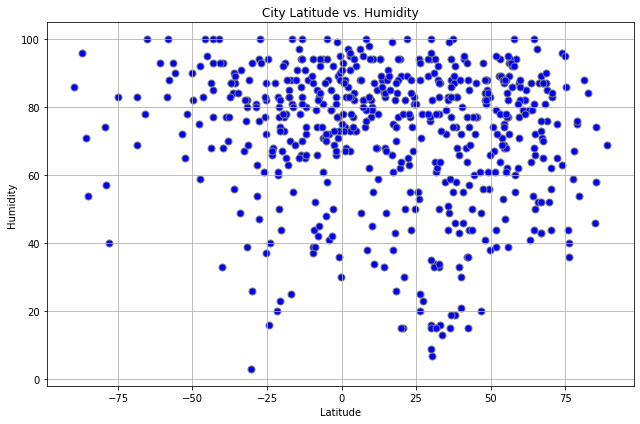

In [26]:
x_axis=clear_city_data['Latitude']
y_axis=clear_city_data['Humidity']
plt.figure(figsize=(9,6))
plt.scatter(x_axis,y_axis,marker="o", facecolors="blue",edgecolors="grey", s=50)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

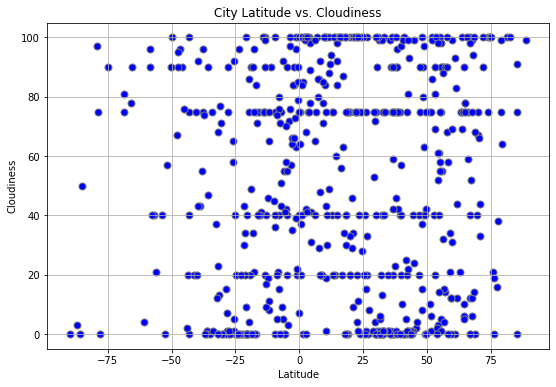

In [27]:
x_axis=clear_city_data['Latitude']
y_axis=clear_city_data['Cloudiness']
plt.figure(figsize=(9,6))
plt.scatter(x_axis,y_axis,marker="o", facecolors="blue",edgecolors="grey", s=50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness")

plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

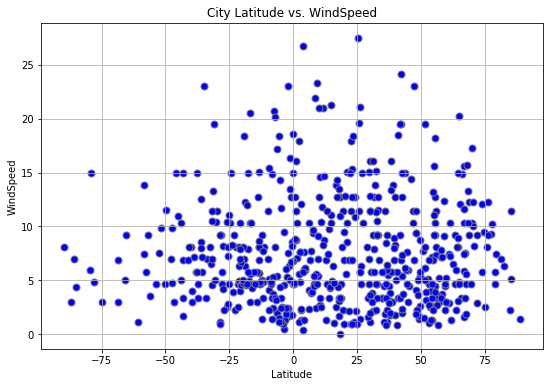

In [28]:
x_axis=clear_city_data['Latitude']
y_axis=clear_city_data['WindSpeed']
plt.figure(figsize=(9,6))
plt.scatter(x_axis,y_axis,marker="o", facecolors="blue",edgecolors="grey", s=50)
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.title(f"City Latitude vs. WindSpeed")

plt.grid(True)

plt.show()

## Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [33]:
# Create Northern and Southern Hemisphere DataFrames
Nothern_hemisphere=clear_city_data.loc[clear_city_data['Latitude']>=0]
Nothern_hemisphere

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,vyritsa,59.454877,30.361195,63.00,77.0,12.0,4.47,RU,1.595200e+09
1,cherskiy,67.037077,161.352739,71.44,43.0,0.0,5.91,RU,1.595200e+09
4,clyde river,72.173768,-68.026601,46.40,75.0,90.0,9.17,CA,1.595200e+09
6,bor,37.460470,34.807838,61.00,100.0,75.0,4.47,RU,1.595200e+09
7,bethel,55.575587,-164.610999,87.01,62.0,1.0,10.29,US,1.595200e+09
...,...,...,...,...,...,...,...,...,...
606,bandar-e anzali,37.419226,49.325285,80.76,74.0,23.0,2.93,IR,1.595200e+09
609,tilichiki,57.855936,166.004726,52.84,92.0,100.0,7.78,RU,1.595200e+09
611,sulphur springs,32.844566,-95.314556,99.00,34.0,1.0,9.17,US,1.595200e+09
612,inirida,4.221760,-66.234260,76.01,94.0,89.0,1.36,CO,1.595200e+09


The r-squared is : 0.4114751531086359 


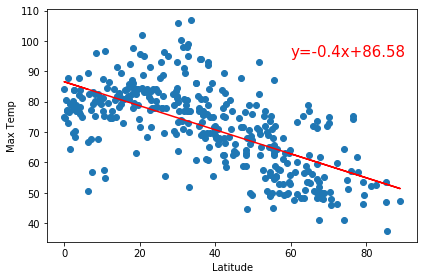

In [34]:
y_values=Nothern_hemisphere["Max_Temp"]
x_values=Nothern_hemisphere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(60,95),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-squared is : {rvalue**2} ")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [35]:
Sothern_hemispehere=clear_city_data.loc[clear_city_data['Latitude']<0]
Sothern_hemispehere

,Cities,Latitude,Longtitude,Max_Temp,Humidity,Cloudiness,WindSpeed,Country,Date
2,mount gambier,-43.120246,138.018685,44.60,93.0,40.0,6.93,AU,1.595200e+09
3,caravelas,-25.382881,-23.787996,71.94,82.0,92.0,7.27,BR,1.595200e+09
5,albany,-85.079362,107.257763,93.00,54.0,50.0,4.36,US,1.595200e+09
11,cape town,-56.696672,4.203726,60.01,93.0,40.0,9.17,ZA,1.595200e+09
12,bowen,-18.957823,149.023028,70.00,93.0,90.0,6.33,AU,1.595200e+09
...,...,...,...,...,...,...,...,...,...
604,quito,-0.162607,-78.625762,71.60,30.0,75.0,14.99,EC,1.595200e+09
607,srandakan,-9.849639,109.194611,75.13,89.0,45.0,6.98,ID,1.595200e+09
608,sao sebastiao,-25.680164,-45.193671,66.45,83.0,5.0,2.77,BR,1.595200e+09
610,manicore,-5.361339,-61.164495,86.00,70.0,58.0,1.12,BR,1.595200e+09


The r-squared is : 0.31496640543770793 


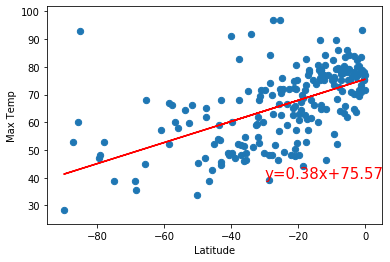

In [40]:
y_values=Sothern_hemispehere["Max_Temp"]
x_values=Sothern_hemispehere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=40)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.xlim(min(Sothern_hemispehere["Latitude"])-5,max(Sothern_hemispehere["Latitude"])+5)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(-30,40),fontsize=15,color="red")
print(f"The r-squared is : {rvalue**2} ")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.004933941013682585 


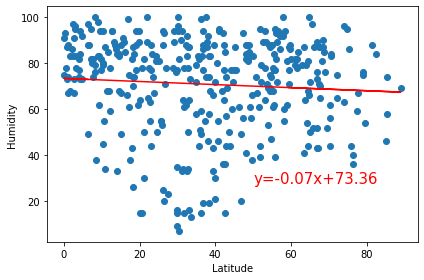

In [41]:
y_values=Nothern_hemisphere["Humidity"]
x_values=Nothern_hemisphere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(50,28),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-squared is : {rvalue**2} ")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.008675130424623102 


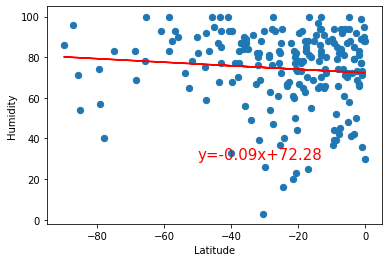

In [46]:
y_values=Sothern_hemispehere["Humidity"]
x_values=Sothern_hemispehere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=40)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(min(Sothern_hemispehere["Latitude"])-5,max(Sothern_hemispehere["Latitude"])+5)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(-50,30),fontsize=15,color="red")
print(f"The r-squared is : {rvalue**2} ")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.003954545805348909 


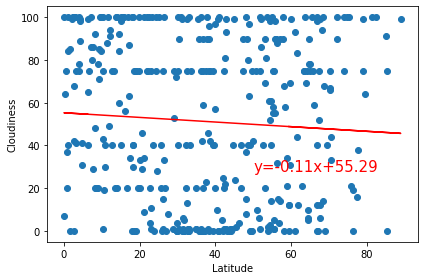

In [47]:
y_values=Nothern_hemisphere["Cloudiness"]
x_values=Nothern_hemisphere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(50,28),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-squared is : {rvalue**2} ")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.0020040744276154238 


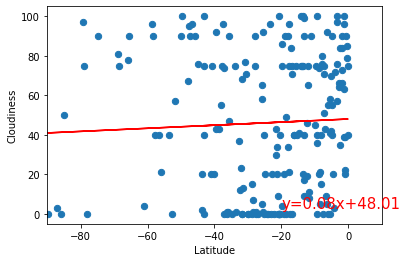

In [48]:
y_values=Sothern_hemispehere["Cloudiness"]
x_values=Sothern_hemispehere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=40)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-90,10)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(-20,3),fontsize=15,color="red")
print(f"The r-squared is : {rvalue**2} ")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.005290677121138059 


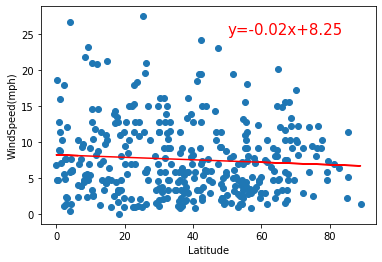

In [49]:
y_values=Nothern_hemisphere["WindSpeed"]
x_values=Nothern_hemisphere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("WindSpeed(mph)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(50,25),fontsize=15,color="red")

print(f"The r-squared is : {rvalue**2} ")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 8.388158159132827e-05 


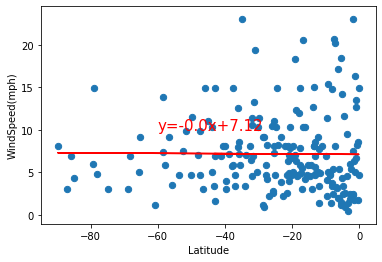

In [53]:
y_values=Sothern_hemispehere["WindSpeed"]
x_values=Sothern_hemispehere["Latitude"]
slope,intercept,rvalue,pvalue,stderr=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_equ="y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=40)
plt.xlabel("Latitude")
plt.ylabel("WindSpeed(mph)")
plt.xlim(min(Sothern_hemispehere["Latitude"])-5,max(Sothern_hemispehere["Latitude"])+5)
plt.ylim(min(y_values)-1.5,max(y_values)+1.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(-60,10),fontsize=15,color="red")
print(f"The r-squared is : {rvalue**2} ")
plt.show()